# Common machine learning methods

In this lesson we will cover four well-known machine learning methods:
1. Support vector machine.
2. Kernel methods.
3. Nearest neighbours.
4. Decision tree.

We haven't used the Cardiovascular Disease data for building models yet, so let's do that!

Remember the machine learning process:
1. Load the data.
2. Clean the data.
3. Split the data for training and testing.
4. Build a model.
5. Train the model.
6. Test the model.
7. Improve the model, repeating steps 4-6.

In [1]:
# import functions
import numpy as np # mathematics
import pandas as pd # data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for standardising

# load data
df = pd.read_csv('../data/heart.csv') # df = pd.read_csv('heart.csv')

# clean data
df.loc[df['ca'].isna(), 'ca'] = 0
df.loc[df['thal'].isna(), 'thal'] = 5

# train-test split
y = df['disease']
X = df.drop(columns = ['disease'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# standardise
scaler = StandardScaler()
scaler.fit(X_train) # use only information in training set for standardising
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

For this data the response $y$ is binary - heart disease ($y=1$) or no heart disease ($y=0$).

# Support vector machine (SVM)
This is another classifier based on linear modelling, similar to logistic regression. Rather than predicting the probability of each response $y$ being 0 or 1, a support vector machine splits the $X$ data in half using a **hyperplane** so that most of the data on one side have $y=0$, and most of the data on the other side have $y=0$. Hyperplanes are defined by an equation of the form $\beta X = 0$ (this is the "linear" part of SVMs). Let's give an example when we have a single predictor $x$.

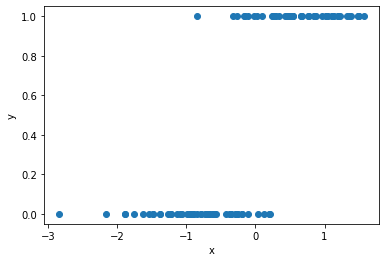

In [2]:
import matplotlib.pyplot as plt
x_example = np.random.normal(size=100)
y_example = np.random.binomial(n=1, p=1/(1+np.exp(-3*x_example)))
plt.scatter(x_example, y_example)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In this case $x$ takes values on the real line, so hyperplane equations take the form $a + bx = 0$, which simplifies to $x = x_0$. The support vector machine classifies all data points with $x < x_0$ as one class and all data points with $x > x_0$ as the other.

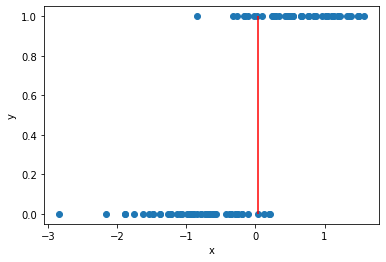

In [3]:
from sklearn.svm import SVC

svm_example = SVC(kernel='linear') # SVC applies a kernel method by default - see next section
svm_example.fit(x_example.reshape(-1, 1), y_example)

# find decision boundary
x0 = (max(x_example[svm_example.predict(x_example.reshape(-1, 1)) == 0]) + min(x_example[svm_example.predict(x_example.reshape(-1, 1)) == 1]))/2

plt.scatter(x_example, y_example)
plt.vlines(x0, 0, 1, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This generalises to higher dimensional $X$, where we have multiple predictors. The plots below show $X$ datapoints in two and three-dimensional spaces (when we have either two or three predictors), with the corresponding $y$ values being represented as green circles and red squares.

<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZpkLQf2FNfzfH4HXeMw4MQ.png' title='Hyperplanes' width=500/>

Now that we understand what the support vector machine is doing, let's apply it to our heart disease data.

In [4]:
from sklearn.metrics import accuracy_score # for evaluating model performance

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Accuracy = ' + str(accuracy_score(y_test, svm.predict(X_test))))

Accuracy = 0.8524590163934426


# Kernel methods
We can extend linear models of the form $\beta X$ by turning the existing predictors into several new features $ x \mapsto (\tilde x_1, \ldots, \tilde x_p)$ using a **non-linear** transformation, and then fitting a linear model $\tilde \beta \tilde X$. Kernel methods give an automatic way of doing this. These approaches often do well when the number of predictors of $X$ is small to begin with, but get into trouble when we have a lot of original predictors.

For classification the most common approach is the kernel support vector machine, for regression it is kernel ridge regression. We demonstrate kernel SVM here.

In [5]:
ksvm = SVC(kernel='poly') # This uses the polynomial kernel. Another popular choice is the "radial basis function": kernel='rbf'
ksvm.fit(X_train, y_train)
print('Accuracy = ' + str(accuracy_score(y_test, ksvm.predict(X_test))))

Accuracy = 0.8852459016393442


# Nearest neighbours
Given a new data point $\tilde x$ to be classified, this approach searches for the most similar few data points to $\tilde x$ in the training data, say $x_1, \ldots, x_K$, and then predicts the most common label amongst the corresponding $y_1, \ldots, y_K$. Common choices for $K$ are 5 and 10. For regression, the prediction is the average of $y_1, \ldots, y_K$.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

nn = KNeighborsClassifier(n_neighbours = 5) # Another popular choice is n_neighbours = 10.
nn.fit(X_train, y_train)
print('Accuracy = ' + str(accuracy_score(y_test, nn.predict(X_test))))

TypeError: __init__() got an unexpected keyword argument 'n_neighbours'

# Decision tree
A decision tree consists of a series of yes/no questions about the preditors which is used to divide data points into groups with similar responses. In some ways this is similar to how humans make decisions. In this case the rules are learned automatically so as to maximise the predictive power. We choose the size of the tree, typically by specifying the maximum number of questions to be asked of each data point (depth of the tree), or the minimum number of samples in each of the final groups (size of the leaves).

<img src='https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png' title='Decision tree' width=500/>

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3) # Try out max_depth between 2 and 8.
tree.fit(X_train, y_train)
print('Accuracy = ' + str(accuracy_score(y_test, tree.predict(X_test))))

Accuracy = 0.8360655737704918


Decision trees themselves tend not to be very good, but we can combine multiple of them to make much better ML methods. We will see this later in the course.

Decision trees have a couple of nice interpretability features. We can plot the decision rules themselves:

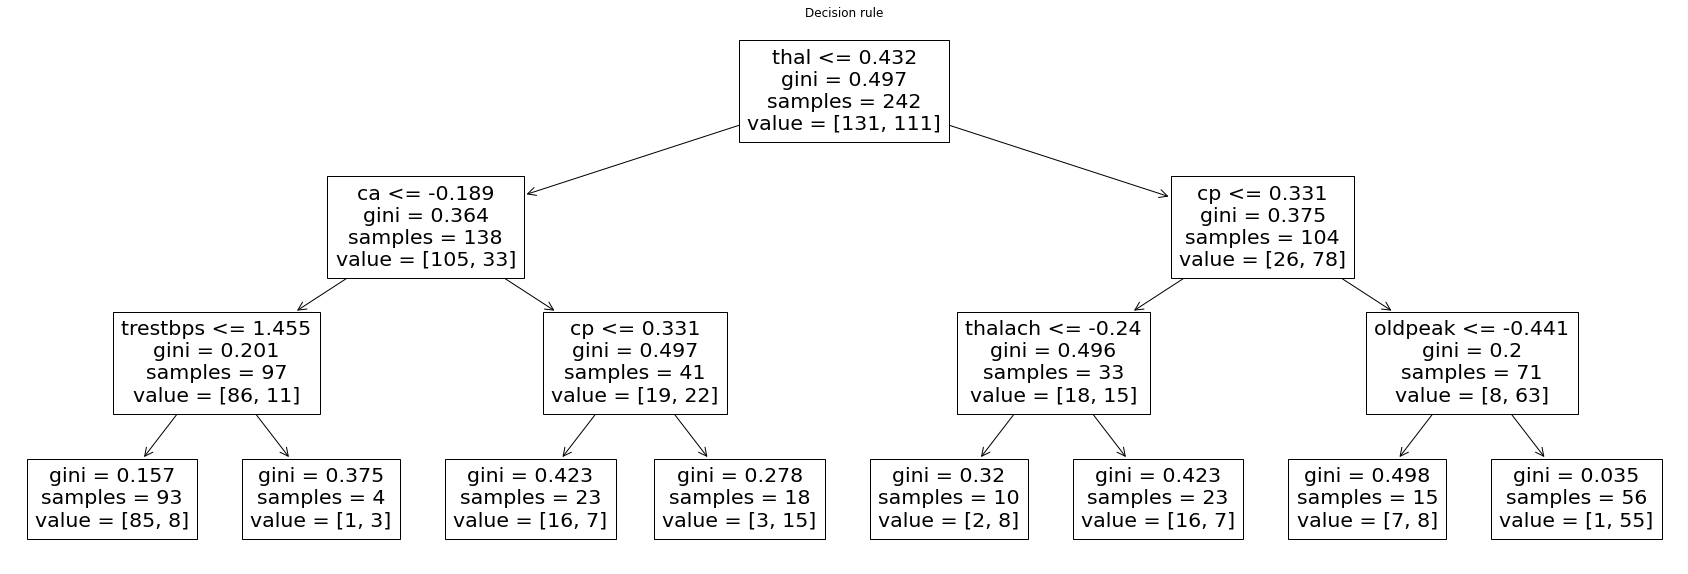

In [8]:
from sklearn.tree import plot_tree
plt.rcParams['figure.figsize'] = [30, 10]

plot_tree(tree, feature_names=list(X_train.columns))
plt.title('Decision rule')
plt.show()

We can also plot estimates of the importance of each feature:

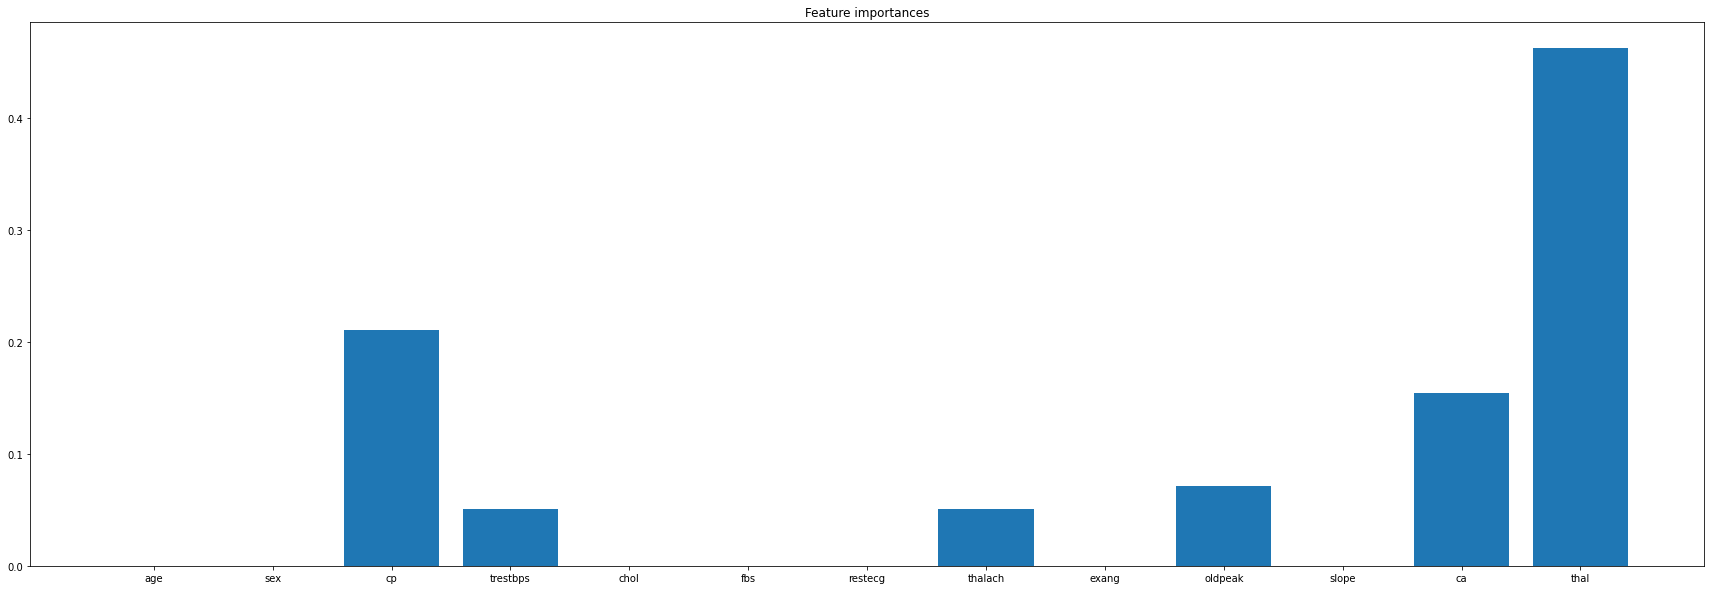

In [9]:
plt.bar(X_train.columns, tree.feature_importances_)
plt.title('Feature importances')
plt.show()

# Bonus: Machine learning regression

The last section applied the machine learning procedures to the classification task of predicting heart disease. We can use similar methods for regression, such as the house price data that we looked at last lesson.

In [10]:
# Load data (already cleaned)
df = pd.read_csv('../data/house.csv') # df = pd.read_csv('house.csv')
columns = ['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea']
X = df[columns]
y = np.log(df['SalePrice'])

# Train-test split and standardise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train) # use only information in training set for standardising
X_train = pd.DataFrame(scaler.transform(X_train), columns = columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = columns)

In [17]:
# Build model
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# # # Choose a model! You may use one of the following (delete the "#" on only the one you want), or choose your own (don't forget to import it).
model = KernelRidge(alpha=1, kernel='poly') # also try kernel='rbf'
#model = KNeighborsRegressor(n_neighbors=5) # also try n_neighbors=10
#model = DecisionTreeRegressor(max_depth=3) # try max_depth between 2 and 8

In [18]:
# Train model
model.fit(X_train, y_train)

KernelRidge(kernel='poly')

In [19]:
from sklearn.metrics import mean_squared_error

# Test model
predictions = model.predict(X_test)
print('Error = ' + str(mean_squared_error(y_test, predictions)))

Error = 0.0611743963295221


What is the smallest test error that you are able to achieve? Was it better than the linear methods from last lesson?

**Bonus:** Find the documentation for one of the machine learning methods we met today (for example <https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>). Look at the parameters you are able to specify, and try out some of the options (for example ```model = DecisionTreeRegressor(max_depth=5, max_features="sqrt")```). 